# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **San Jose, California, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **San Jose, California, United States** to Ann Arbor, USA. In that case at least one source file must be about **San Jose, California, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **San Jose, California, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips

* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example

Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [ ]:
# https://github.com/clcff/index-test-number-5/blob/master/Assignment4%20(6).py
# https://github.com/mraty/applied-data-science/blob/master/course-2_applied_plotting/Assignment4.ipynb

## Code

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

# Get the weather data
sj_df = pd.read_csv("weather_san_jose_california_v2.csv")
rm_df = pd.read_csv("weather_richmond_virginia_v2.csv")

# Separate out the year and month date
# San Jose, California
sj_df["Day"] = pd.to_datetime(sj_df["Day"]).astype(str)
sj_df["Year"] = sj_df["Day"].apply(lambda x: x[:4])
sj_df["Month"] = sj_df["Day"].apply(lambda x: x[5:7])
sj_df["Date"] = sj_df["Day"].apply(lambda x: x[8:])
# Richmond, Virginia
rm_df["Day"] = pd.to_datetime(rm_df["Day"]).astype(str)
rm_df["Year"] = rm_df["Day"].apply(lambda x: x[:4])
rm_df["Month"] = rm_df["Day"].apply(lambda x: x[5:7])
rm_df["Date"] = rm_df["Day"].apply(lambda x: x[8:])

# Filter out the "High" and "Low" data
# San Jose High
sj_max_df = sj_df[["Year", "Month", "Date", "High"]]
sj_max_df = sj_max_df.groupby(["Year", "Month"]).aggregate({"High": np.max})
sj_max_df.reset_index(inplace = True)
# San Jose Low
sj_min_df = sj_df[["Year", "Month", "Date", "Low"]]
sj_min_df = sj_min_df.groupby(["Year", "Month"]).aggregate({"Low": np.min})
sj_min_df.reset_index(inplace = True)
# Richmond High
rm_max_df = rm_df[["Year", "Month", "Date", "High"]]
rm_max_df = rm_max_df.groupby(["Year", "Month"]).aggregate({"High": np.max})
rm_max_df.reset_index(inplace = True)
# Richmond Low
rm_min_df = rm_df[["Year", "Month", "Date", "Low"]]
rm_min_df = rm_min_df.groupby(["Year", "Month"]).aggregate({"Low": np.min})
rm_min_df.reset_index(inplace = True)

## Plot

<IPython.core.display.Javascript object>


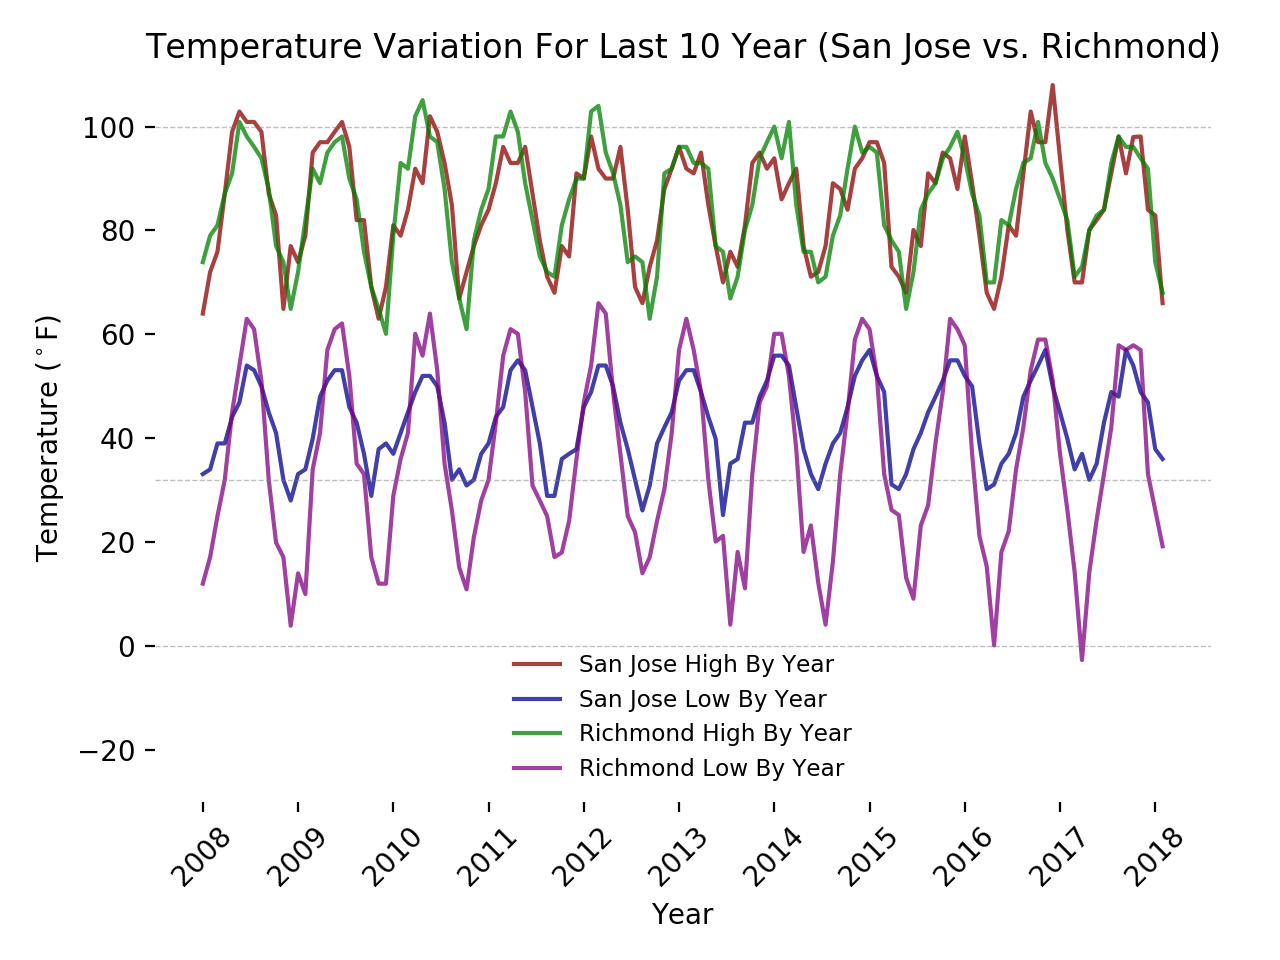

In [130]:
# Create the figure
plt.figure()

# Plot San Jose, California data
_ = plt.plot(sj_max_df.index.to_numpy(),
             sj_max_df["High"].to_numpy(),
             "darkred",
             label = "San Jose High By Year",
             alpha = 0.75)

_ = plt.plot(sj_min_df.index.to_numpy(),
             sj_min_df["Low"].to_numpy(),
             "darkblue",
             label = "San Jose Low By Year",
             alpha = 0.75)

# Plot Richmond, Virginia data
_ = plt.plot(rm_max_df.index.to_numpy(),
             rm_max_df["High"].to_numpy(),
             "green",
             label = "Richmond High By Year",
             alpha = 0.75)

_ = plt.plot(rm_min_df.index.to_numpy(),
             rm_min_df["Low"].to_numpy(),
             "purple",
             label = "Richmond Low By Year",
             alpha = 0.75)

# Set the Y axis range
plt.ylim(-30, 110)

# Add legend with no frame
plt.legend(loc = 8,
           fontsize = "small",
           handlelength = 2,
           frameon = False)

# Label X axis
plt.xticks(range(0, 132, 13),
           ["2008",
            "2009",
            "2010",
            "2011",
            "2012",
            "2013",
            "2014",
            "2015",
            "2016",
            "2017",
            "2018"],
           rotation = 45)
plt.xlabel("Year")

# Label Y axis
plt.ylabel("Temperature ($^\circ$F)")

# Add temperature markers
plt.axhline(y = 100, ls = "--", lw = 0.5, c = "gray", alpha = 0.5)
plt.axhline(y = 32, ls = "--", lw = 0.5, c = "gray", alpha = 0.5)
plt.axhline(y = 0, ls = "--", lw = 0.5, c = "gray", alpha = 0.5)

# Remove border
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Title
plt.title("Temperature Variation For Last 10 Year (San Jose vs. Richmond)")

# Fit
plt.tight_layout()

# Show the plot
plt.show()

# Weather Phenomena

## Region and Domain

> San Jose, California, United States
<br />
> Weather Phenomena

## Research Question

> How have the maximum and minimum temperature change for San Jose, California and Richmond, Virginia, which lays on a relatively same latitude, over the last 10 years.

## Links

> * [U.S. climate data for San Jose, California](https://www.usclimatedata.com/climate/san-jose/california/united-states/usca0993)
> * [U.S. climate data for Richmond, Virginia](https://www.usclimatedata.com/climate/richmond/virginia/united-states/usva1556)
> * [Weather Underground](https://www.wunderground.com/)

## Discussion

> This data of this study take a look at the maximum and minimum temperature for San Jose, California and Richmond, Virginia over a 10 year period. The data were gather from **U.S. Climate Data** for the year of 2008 to 2018 for daily measurements. However, there were a few gaps for the data for both dataset, so **Weather Underground** was used to fill in those gaps. Once no gaps are found in both dataset, then they are grouped by year and months, then plotted on a graph. The graph is tune using Cairo's design principles. The graph shows 10 years of temperature high and low for both San Jose and Richmond.

> Taking a look at San Jose, you can see that peak temperature reached over 100 degrees fahrenheit on 2017. The max temperature from 2011 to 2016 seem lower (around 95 degrees fahrenheit) when compared to the other years. The temperature high for both San Jose and Richmond are close to each other with not too much extreme difference. But if we take a look at the temperture low data, you can see quite a bit of variation between San Jose and Richmond. San Jose has temperature low hoving around the freezing point of 32 degress fahrenheit, where as Richmond have temperature low of well below freezing every year. Some of the temperature even went below 0 degrees fahrenheit. There are 3 horizontal markers to indicate the temperature of 0, 32, and 100 degress fahrenheit. Based on this analysis, it showed that there is not much variation on the temperature high. However, the temperature low show quite a bit of differences for the 10 year period.

## Cairo’s Principle

**Truthfulness**

The data are gather from a website with historical data and using validation of two sources to ensure they are correct.

**Beauty**

After graphing data and visualizing it, we remove all the extra elements to improve the ink ratio.

**Functionality**

The visualization provide information on the temperature high and low over a 10 year period to see how the temperature fluctuates.

**Insightfulness**

To make a comparison, we took a city with similar latitude coordinates but in a different longitude. We overlay the data on top of each other to show a correlation if any between the datasets.